# 1.10

### Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def get_delta_t(delta_x, buffer):
    return 0.5 * np.square(delta_x) * buffer

### Initialization

In [3]:
space_steps = 101
    
delta_x = 1/(space_steps - 1)
delta_t = 0.001

time_step_space = 0.3

time_steps = int(np.ceil(time_step_space / delta_t))

current_temperature = np.zeros(space_steps)
next_temperature = np.zeros(space_steps)
plot_data = []

current_temperature[0] = 350
current_temperature[-1] = 250

next_temperature[0] = 350
next_temperature[-1] = 250

alpha = delta_t / delta_x**2

### Heat simulation

In [21]:
# Preparing matrix A
a = -alpha * np.ones(space_steps)
b = (1 + 2 * alpha) * np.ones(space_steps)
c = -alpha * np.ones(space_steps)
d = np.zeros(space_steps)

for i in range(space_steps - 2):
    j = (i + 1) * delta_x
    current_temperature[i + 1] = 350 - 100 * j + 200 * np.sin(np.pi * j)

# Time-stepping
plot_data = [current_temperature.copy()]
for t in range(time_steps):
    # Adjust for boundary conditions in the vector d, if necessary
    d[0] = current_temperature[0]
    d[-1] = current_temperature[-1]
    d[1:-1] = current_temperature[1:-1]
    
    # Solve the tridiagonal system of equations using the Thomas algorithm
    c_star = np.zeros_like(c)
    d_star = np.zeros_like(d)
    c_star[0] = c[0] / b[0]
    d_star[0] = d[0] / b[0]

    for i in range(1, space_steps - 2):
        c_star[i] = c[i] / (b[i] - a[i - 1] * c_star[i - 1])
        d_star[i] = (d[i] - a[i - 1] * d_star[i - 1]) / (b[i] - a[i - 1] * c_star[i - 1])
        
    next_temperature[-1] = d_star[-1]

    for i in range(space_steps - 4, -1, -1):
        next_temperature[i + 1] = d_star[i] - c_star[i] * next_temperature[i + 2]
    
    current_temperature = next_temperature.copy()
    plot_data.append(current_temperature.copy())

### 3D Plot

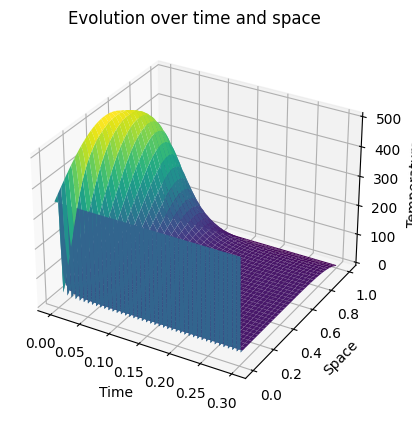

In [22]:
#plotting
data_np = np.array(plot_data)
data_np = data_np.T 

space = np.linspace(0, 1, space_steps)
time = np.linspace(0, time_step_space, time_steps + 1)

Time, Space = np.meshgrid(time, space)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Time, Space, data_np, cmap='viridis') 

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('Temperature')
ax.set_title('Evolution over time and space')
plt.show()

### 2D Plot

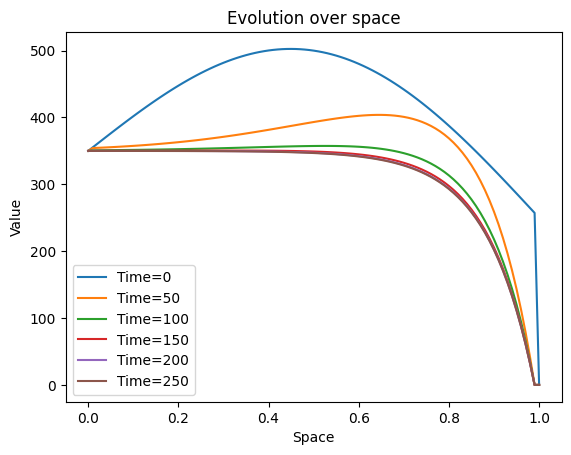

In [14]:
#plotting
data_np = np.array(plot_data)
data_np = data_np.T 

space = np.linspace(0, 1, space_steps)
time = np.linspace(0, 1, time_steps)

# Plotting for discrete timestamp values
for t in range(0, time_steps, 50):  # Change the step size as per your requirement
    plt.plot(space, data_np[:, t], label=f'Time={t}')

plt.xlabel('Space')
plt.ylabel('Value')
plt.title('Evolution over space')
plt.legend()
plt.show()